
Lambda School Data Science

*Unit 2, Sprint 3, Module 4*

---

# Model Interpretation

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Continue to iterate on your project: data cleaning, exploratory visualization, feature engineering, modeling.
- [ ] Make at least 1 partial dependence plot to explain your model.
- [ ] Make at least 1 Shapley force plot to explain an individual prediction.
- [ ] **Share at least 1 visualization (of any type) on Slack!**

If you aren't ready to make these plots with your own dataset, you can practice these objectives with any dataset you've worked with previously. Example solutions are available for Partial Dependence Plots with the Tanzania Waterpumps dataset, and Shapley force plots with the Titanic dataset. (These datasets are available in the data directory of this repository.)

Please be aware that **multi-class classification** will result in multiple Partial Dependence Plots (one for each class), and multiple sets of Shapley Values (one for each class).

## Stretch Goals

#### Partial Dependence Plots
- [ ] Make multiple PDPs with 1 feature in isolation.
- [ ] Make multiple PDPs with 2 features in interaction. 
- [ ] Use Plotly to make a 3D PDP.
- [ ] Make PDPs with categorical feature(s). Use Ordinal Encoder, outside of a pipeline, to encode your data first. If there is a natural ordering, then take the time to encode it that way, instead of random integers. Then use the encoded data with pdpbox. Get readable category names on your plot, instead of integer category codes.

#### Shap Values
- [ ] Make Shapley force plots to explain at least 4 individual predictions.
    - If your project is Binary Classification, you can do a True Positive, True Negative, False Positive, False Negative.
    - If your project is Regression, you can do a high prediction with low error, a low prediction with low error, a high prediction with high error, and a low prediction with high error.
- [ ] Use Shapley values to display verbal explanations of individual predictions.
- [ ] Use the SHAP library for other visualization types.

The [SHAP repo](https://github.com/slundberg/shap) has examples for many visualization types, including:

- Force Plot, individual predictions
- Force Plot, multiple predictions
- Dependence Plot
- Summary Plot
- Summary Plot, Bar
- Interaction Values
- Decision Plots

We just did the first type during the lesson. The [Kaggle microcourse](https://www.kaggle.com/dansbecker/advanced-uses-of-shap-values) shows two more. Experiment and see what you can learn!

### Links

#### Partial Dependence Plots
- [Kaggle / Dan Becker: Machine Learning Explainability — Partial Dependence Plots](https://www.kaggle.com/dansbecker/partial-plots)
- [Christoph Molnar: Interpretable Machine Learning — Partial Dependence Plots](https://christophm.github.io/interpretable-ml-book/pdp.html) + [animated explanation](https://twitter.com/ChristophMolnar/status/1066398522608635904)
- [pdpbox repo](https://github.com/SauceCat/PDPbox) & [docs](https://pdpbox.readthedocs.io/en/latest/)
- [Plotly: 3D PDP example](https://plot.ly/scikit-learn/plot-partial-dependence/#partial-dependence-of-house-value-on-median-age-and-average-occupancy)

#### Shapley Values
- [Kaggle / Dan Becker: Machine Learning Explainability — SHAP Values](https://www.kaggle.com/learn/machine-learning-explainability)
- [Christoph Molnar: Interpretable Machine Learning — Shapley Values](https://christophm.github.io/interpretable-ml-book/shapley.html)
- [SHAP repo](https://github.com/slundberg/shap) & [docs](https://shap.readthedocs.io/en/latest/)

In [ ]:
# %%capture
# import sys

# # If you're on Colab:
# if 'google.colab' in sys.modules:
#     DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
#     !pip install category_encoders==2.*
#     !pip install eli5
#     !pip install pdpbox
#     !pip install shap

# # If you're working locally:
# else:
#     DATA_PATH = '../data/'

In [ ]:
%%capture
!pip install category_encoders==2.*

In [ ]:
# important imports
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
file='/content/drive/My Drive/data sets/Crash_Analysis_System_CAS_data.csv'
dfcrash=pd.read_csv(file, error_bad_lines=False)
dfcrash.sample()

,X,Y,OBJECTID,advisorySpeed,animals,areaUnitID,bicycle,bridge,bus,carStationWagon,cliffBank,crashDirectionDescription,crashDistance,crashFinancialYear,crashLocation1,crashLocation2,crashSeverity,crashSHDescription,crashYear,debris,directionRoleDescription,ditch,easting,fatalCount,fence,flatHill,guardRail,holiday,houseOrBuilding,intersectionMidblock,junctionType,kerb,light,meshblockId,minorInjuryCount,moped,motorcycle,northing,NumberOfLanes,objectThrownOrDropped,otherObject,otherVehicleType,outdatedLocationDescription,overBank,parkedVehicle,pedestrian,phoneBoxEtc,postOrPole,region,roadCharacter,roadCurvature,roadLane,roadMarkings,roadSurface,roadworks,schoolBus,seriousInjuryCount,slipOrFlood,speedLimit,strayAnimal,streetLight,suv,taxi,temporarySpeedLimit,tlaId,tlaName,trafficControl,trafficIsland,trafficSign,train,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,weatherB
471687,1547909.0,5202482.0,469688,NaN,0.0,586114.0,0.0,0.0,0.0,0.0,0.0,Null,NaN,2009,WOODFIELDS ROAD,HOWSONS ROAD,Minor Crash,No,2008,0.0,East,0.0,1547909.0,0.0,1.0,Flat,0.0,NaN,0.0,Intersection,Crossroads,0.0,Bright sun,2450803.0,2.0,0.0,0.0,5202482.0,2.0,0.0,0.0,0.0,Current location,0.0,0.0,NaN,0.0,0.0,Canterbury Region,Nil,Straight,2-way,NaN,Unsealed,0.0,0.0,0.0,0.0,100.0,0.0,Null,2.0,0.0,NaN,59.0,Waimakariri District,Give way,0.0,0.0,0.0,0.0,0.0,0.0,Open,0.0,0.0,0.0,Fine,Null


In [ ]:
target='crashSeverity'
features=dfcrash.columns.drop([target,'OBJECTID','roadMarkings','minorInjuryCount','fatalCount','seriousInjuryCount'])

train, test = train_test_split(dfcrash, train_size=0.80, test_size=0.20, 
                              stratify=dfcrash[target], random_state=42)

def wrangle(df):
  df=df.copy()
  df['holiday']=df['holiday'].replace('unknown',np.nan)
  df=df.replace(0,np.nan)
  return df

train=wrangle(train)
test=wrangle(test)

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

In [ ]:
baseline=(y_train.value_counts(normalize=True)[0])
print(f'The majority class baseline is: {baseline:.4%}')

The majority class baseline is: 71.0987%


In [ ]:
df_wrangle=wrangle(dfcrash)
df_wrangle.shape

(705824, 79)

In [ ]:
dfcrash['crashSeverity'].value_counts()

Non-Injury Crash    501832
Minor Crash         158452
Serious Crash        39112
Fatal Crash           6428
Name: crashSeverity, dtype: int64

In [ ]:
dfcrash['crashSeverity'].value_counts(normalize=True)

Non-Injury Crash    0.710987
Minor Crash         0.224492
Serious Crash       0.055413
Fatal Crash         0.009107
Name: crashSeverity, dtype: float64

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



                  precision    recall  f1-score   support

     Fatal Crash       0.25      0.00      0.00      1286
     Minor Crash       0.29      0.00      0.00     31690
Non-Injury Crash       0.71      1.00      0.83    100367
   Serious Crash       0.40      0.00      0.00      7822

        accuracy                           0.71    141165
       macro avg       0.41      0.25      0.21    141165
    weighted avg       0.60      0.71      0.59    141165

Train accuracy: 71.0848%
Test accuracy: 71.0849%
CPU times: user 1min 20s, sys: 15.5 s, total: 1min 35s
Wall time: 1min 6s


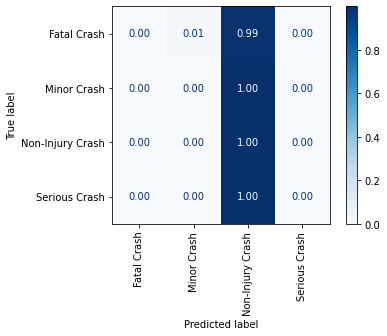

In [ ]:
%%time
pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(), 
    StandardScaler(),
    LogisticRegression()
)

pipeline.fit(X_train, y_train)

print(classification_report(y_test, pipeline.predict(X_test)))

print(f'Train accuracy: {pipeline.score(X_train, y_train):.4%}')
print(f'Test accuracy: {pipeline.score(X_test, y_test):.4%}')
plot_confusion_matrix(pipeline, X_test, y_test, 
                      xticks_rotation='vertical', 
                      normalize='true',
                      values_format='.2f',
                      cmap='Blues');

                  precision    recall  f1-score   support

     Fatal Crash       0.03      0.03      0.03      1286
     Minor Crash       0.26      0.28      0.27     31690
Non-Injury Crash       0.74      0.72      0.73    100367
   Serious Crash       0.10      0.11      0.10      7822

        accuracy                           0.58    141165
       macro avg       0.28      0.28      0.28    141165
    weighted avg       0.59      0.58      0.58    141165

Train accuracy: 99.9543%
Test accuracy: 57.7785%
CPU times: user 51.1 s, sys: 391 ms, total: 51.5 s
Wall time: 51.5 s


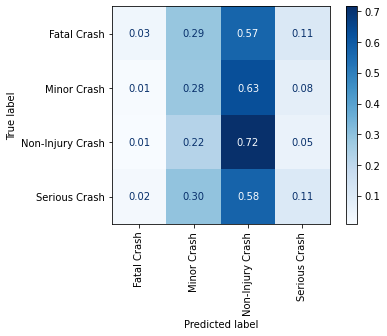

In [ ]:
%%time
pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(strategy='median'), 
    DecisionTreeClassifier()
)

pipeline.fit(X_train, y_train)

print(classification_report(y_test, pipeline.predict(X_test)))

print(f'Train accuracy: {pipeline.score(X_train, y_train):.4%}')
print(f'Test accuracy: {pipeline.score(X_test, y_test):.4%}')
plot_confusion_matrix(pipeline, X_test, y_test, 
                      xticks_rotation='vertical', 
                      normalize='true',
                      values_format='.2f',
                      cmap='Blues');

                  precision    recall  f1-score   support

     Fatal Crash       0.43      0.00      0.00      1286
     Minor Crash       0.56      0.24      0.33     31690
Non-Injury Crash       0.77      0.97      0.86    100367
   Serious Crash       0.41      0.05      0.09      7822

        accuracy                           0.75    141165
       macro avg       0.54      0.31      0.32    141165
    weighted avg       0.70      0.75      0.69    141165

Train accuracy: 89.5259%
Test accuracy: 74.5666%
CPU times: user 9min 26s, sys: 1.16 s, total: 9min 27s
Wall time: 5min 1s


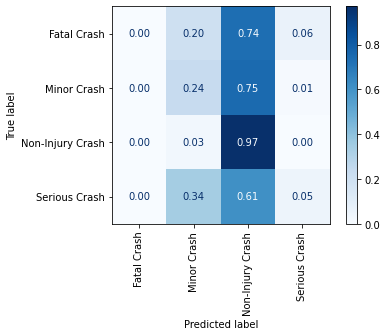

In [ ]:
%%time
pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(), 
    RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42, max_depth=40, min_samples_leaf=2)
)

pipeline.fit(X_train, y_train)

print(classification_report(y_test, pipeline.predict(X_test)))

print(f'Train accuracy: {pipeline.score(X_train, y_train):.4%}')
print(f'Test accuracy: {pipeline.score(X_test, y_test):.4%}')
plot_confusion_matrix(pipeline, X_test, y_test, 
                      xticks_rotation='vertical', 
                      normalize='true',
                      values_format='.2f',
                      cmap='Blues');

                  precision    recall  f1-score   support

     Fatal Crash       0.33      0.00      0.00      1286
     Minor Crash       0.57      0.23      0.33     31690
Non-Injury Crash       0.77      0.98      0.86    100367
   Serious Crash       0.51      0.03      0.06      7822

        accuracy                           0.75    141165
       macro avg       0.54      0.31      0.31    141165
    weighted avg       0.70      0.75      0.69    141165

Train accuracy: 74.7038%
Test accuracy: 74.6977%
CPU times: user 11min 34s, sys: 526 ms, total: 11min 34s
Wall time: 6min


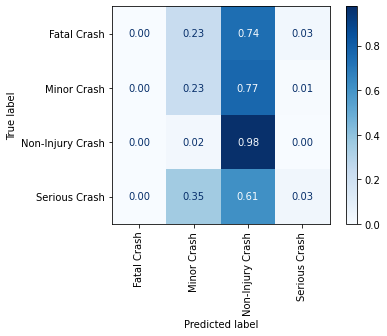

In [ ]:
%%time
pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)

print(classification_report(y_test, pipeline.predict(X_test)))

print(f'Train accuracy: {pipeline.score(X_train, y_train):.4%}')
print(f'Test accuracy: {pipeline.score(X_test, y_test):.4%}')
plot_confusion_matrix(pipeline, X_test, y_test, 
                      xticks_rotation='vertical', 
                      normalize='true',
                      values_format='.2f',
                      cmap='Blues');

In [ ]:
train['crashSeverity'].value_counts()

Non-Injury Crash    401465
Minor Crash         126762
Serious Crash        31290
Fatal Crash           5142
Name: crashSeverity, dtype: int64

In [ ]:
Fatal_Crash = train[train[target]=='Fatal Crash']
# Fatal_Crash=Fatal_Crash.append(Fatal_Crash)
Fatal_Crash.shape[0]

Serious_Crash = train[train[target]=='Serious Crash'].sample(Fatal_Crash.shape[0])
Minor_Crash = train[train[target]=='Minor Crash'].sample(Fatal_Crash.shape[0])
Non_Injury_Crash = train[train[target]=='Non-Injury Crash'].sample(Fatal_Crash.shape[0])

train_undersample  = pd.concat([Fatal_Crash,
                    Serious_Crash,
                    Minor_Crash,
                    Non_Injury_Crash],
                            axis=0)

In [ ]:
train_undersample['crashSeverity'].value_counts()

Non-Injury Crash    5142
Serious Crash       5142
Fatal Crash         5142
Minor Crash         5142
Name: crashSeverity, dtype: int64

In [ ]:
train_undersample=wrangle(train_undersample)
test=wrangle(test)

X_train_undersample = train_undersample[features]
y_train_undersample = train_undersample[target]

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



                  precision    recall  f1-score   support

     Fatal Crash       0.01      0.65      0.03      1286
     Minor Crash       0.24      0.14      0.18     31690
Non-Injury Crash       0.79      0.30      0.44    100367
   Serious Crash       0.07      0.22      0.10      7822

        accuracy                           0.26    141165
       macro avg       0.28      0.33      0.19    141165
    weighted avg       0.62      0.26      0.36    141165

Train accuracy: 26.9765%
Test accuracy: 26.3606%
CPU times: user 17.5 s, sys: 1.71 s, total: 19.2 s
Wall time: 16.6 s


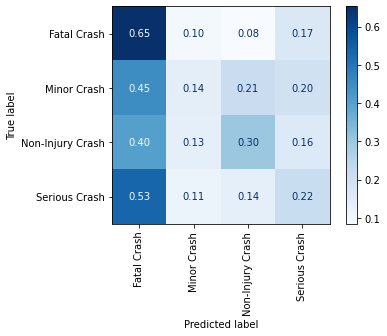

In [ ]:
%%time
pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(), 
    StandardScaler(),
    LogisticRegression()
)

pipeline.fit(X_train_undersample, y_train_undersample)

print(classification_report(y_test, pipeline.predict(X_test)))

print(f'Train accuracy: {pipeline.score(X_train, y_train):.4%}')
print(f'Test accuracy: {pipeline.score(X_test, y_test):.4%}')
plot_confusion_matrix(pipeline, X_test, y_test, 
                      xticks_rotation='vertical', 
                      normalize='true',
                      values_format='.2f',
                      cmap='Blues');

                  precision    recall  f1-score   support

     Fatal Crash       0.02      0.44      0.04      1286
     Minor Crash       0.23      0.27      0.24     31690
Non-Injury Crash       0.77      0.34      0.47    100367
   Serious Crash       0.07      0.26      0.11      7822

        accuracy                           0.32    141165
       macro avg       0.27      0.33      0.21    141165
    weighted avg       0.60      0.32      0.40    141165

Train accuracy: 34.3834%
Test accuracy: 31.8825%
CPU times: user 15 s, sys: 55.9 ms, total: 15 s
Wall time: 15.1 s


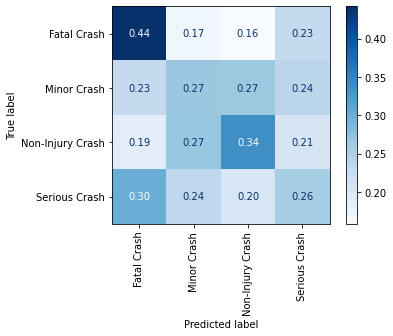

In [ ]:
%%time
pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(strategy='median'), 
    DecisionTreeClassifier()
)

pipeline.fit(X_train_undersample, y_train_undersample)

print(classification_report(y_test, pipeline.predict(X_test)))

print(f'Train accuracy: {pipeline.score(X_train, y_train):.4%}')
print(f'Test accuracy: {pipeline.score(X_test, y_test):.4%}')
plot_confusion_matrix(pipeline, X_test, y_test, 
                      xticks_rotation='vertical', 
                      normalize='true',
                      values_format='.2f',
                      cmap='Blues');

                  precision    recall  f1-score   support

     Fatal Crash       0.02      0.64      0.04      1286
     Minor Crash       0.24      0.23      0.24     31690
Non-Injury Crash       0.83      0.42      0.56    100367
   Serious Crash       0.09      0.24      0.13      7822

        accuracy                           0.37    141165
       macro avg       0.29      0.38      0.24    141165
    weighted avg       0.65      0.37      0.46    141165

Train accuracy: 39.7050%
Test accuracy: 37.3265%
CPU times: user 1min 2s, sys: 221 ms, total: 1min 2s
Wall time: 39.1 s


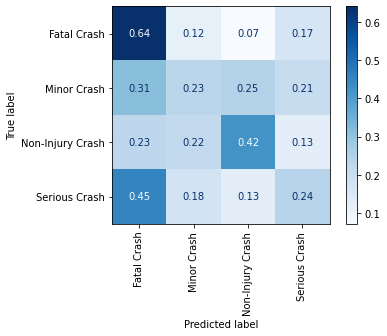

In [ ]:
%%time
pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(), 
    RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42, max_depth=40, min_samples_leaf=2)
)

pipeline.fit(X_train_undersample, y_train_undersample)

print(classification_report(y_test, pipeline.predict(X_test)))

print(f'Train accuracy: {pipeline.score(X_train, y_train):.4%}')
print(f'Test accuracy: {pipeline.score(X_test, y_test):.4%}')
plot_confusion_matrix(pipeline, X_test, y_test, 
                      xticks_rotation='vertical', 
                      normalize='true',
                      values_format='.2f',
                      cmap='Blues');

In [ ]:
(65+23+42+25)/4

38.75

                  precision    recall  f1-score   support

     Fatal Crash       0.02      0.67      0.03      1286
     Minor Crash       0.22      0.15      0.18     31690
Non-Injury Crash       0.82      0.34      0.48    100367
   Serious Crash       0.07      0.20      0.10      7822

        accuracy                           0.29    141165
       macro avg       0.28      0.34      0.20    141165
    weighted avg       0.63      0.29      0.38    141165

Train accuracy: 30.5397%
Test accuracy: 29.1085%
CPU times: user 48.8 s, sys: 68.9 ms, total: 48.9 s
Wall time: 31.2 s


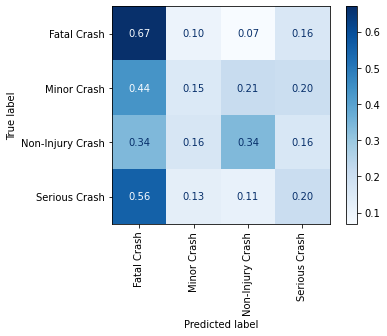

In [ ]:
%%time
pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train_undersample, y_train_undersample)

print(classification_report(y_test, pipeline.predict(X_test)))

print(f'Train accuracy: {pipeline.score(X_train, y_train):.4%}')
print(f'Test accuracy: {pipeline.score(X_test, y_test):.4%}')
plot_confusion_matrix(pipeline, X_test, y_test, 
                      xticks_rotation='vertical', 
                      normalize='true',
                      values_format='.2f',
                      cmap='Blues');

In [ ]:
(67+16+36+21)/4

35.0

In [ ]:
Fatal_Crash = train[train[target]=='Fatal Crash']
Fatal_Crash=Fatal_Crash.append(Fatal_Crash)

Serious_Crash = train[train[target]=='Serious Crash'].sample(Fatal_Crash.shape[0])
Minor_Crash = train[train[target]=='Minor Crash'].sample(Fatal_Crash.shape[0])
Non_Injury_Crash = train[train[target]=='Non-Injury Crash'].sample(Fatal_Crash.shape[0])

train_undersample  = pd.concat([Fatal_Crash,
                    Serious_Crash,
                    Minor_Crash,
                    Non_Injury_Crash],
                            axis=0)

In [ ]:
Fatal_Crash = train[train[target]=='Fatal Crash']
Fatal_Crash_over_under=Fatal_Crash.append(Fatal_Crash)
Fatal_Crash_over_under=Fatal_Crash_over_under.append(Fatal_Crash)
Fatal_Crash_over_under=Fatal_Crash_over_under.append(Fatal_Crash)
Fatal_Crash_over_under=Fatal_Crash_over_under.append(Fatal_Crash)

Serious_Crash_over_under = train[train[target]=='Serious Crash'].sample(Fatal_Crash_over_under.shape[0])
Minor_Crash_over_under = train[train[target]=='Minor Crash'].sample(Fatal_Crash_over_under.shape[0])
Non_Injury_Crash_over_under = train[train[target]=='Non-Injury Crash'].sample(Fatal_Crash_over_under.shape[0])

train_over_under  = pd.concat([Fatal_Crash_over_under,
                    Serious_Crash_over_under,
                    Minor_Crash_over_under,
                    Non_Injury_Crash_over_under],
                            axis=0)

In [ ]:
train_undersample=wrangle(train_undersample)

X_train_over_under = train_over_under[features]
y_train_over_under = train_over_under[target]

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



                  precision    recall  f1-score   support

     Fatal Crash       0.02      0.49      0.03      1286
     Minor Crash       0.26      0.17      0.21     31690
Non-Injury Crash       0.79      0.43      0.56    100367
   Serious Crash       0.08      0.30      0.13      7822

        accuracy                           0.37    141165
       macro avg       0.29      0.35      0.23    141165
    weighted avg       0.63      0.37      0.45    141165

Train accuracy: 37.9773%
Test accuracy: 36.5211%
CPU times: user 29 s, sys: 6.08 s, total: 35.1 s
Wall time: 25.5 s


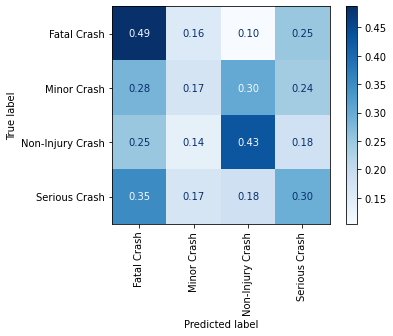

In [ ]:
%%time
pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(), 
    StandardScaler(),
    LogisticRegression()
)

pipeline.fit(X_train_over_under, y_train_over_under)

print(classification_report(y_test, pipeline.predict(X_test)))

print(f'Train accuracy: {pipeline.score(X_train, y_train):.4%}')
print(f'Test accuracy: {pipeline.score(X_test, y_test):.4%}')
plot_confusion_matrix(pipeline, X_test, y_test, 
                      xticks_rotation='vertical', 
                      normalize='true',
                      values_format='.2f',
                      cmap='Blues');

In [ ]:
(47+16+44+30)/4

34.25

                  precision    recall  f1-score   support

     Fatal Crash       0.03      0.14      0.04      1286
     Minor Crash       0.23      0.33      0.27     31690
Non-Injury Crash       0.77      0.40      0.53    100367
   Serious Crash       0.08      0.36      0.13      7822

        accuracy                           0.38    141165
       macro avg       0.28      0.31      0.24    141165
    weighted avg       0.60      0.38      0.44    141165

Train accuracy: 47.4548%
Test accuracy: 37.9910%
CPU times: user 19.2 s, sys: 68.2 ms, total: 19.3 s
Wall time: 19.3 s


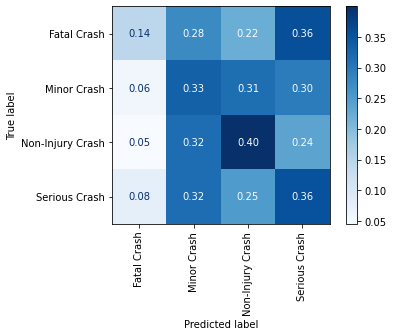

In [ ]:
%%time
pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(strategy='median'), 
    DecisionTreeClassifier()
)

pipeline.fit(X_train_over_under, y_train_over_under)

print(classification_report(y_test, pipeline.predict(X_test)))

print(f'Train accuracy: {pipeline.score(X_train, y_train):.4%}')
print(f'Test accuracy: {pipeline.score(X_test, y_test):.4%}')
plot_confusion_matrix(pipeline, X_test, y_test, 
                      xticks_rotation='vertical', 
                      normalize='true',
                      values_format='.2f',
                      cmap='Blues');

In [ ]:
(15+33+40+36)/4

31.0

                  precision    recall  f1-score   support

     Fatal Crash       0.04      0.36      0.07      1286
     Minor Crash       0.28      0.26      0.27     31690
Non-Injury Crash       0.84      0.58      0.68    100367
   Serious Crash       0.12      0.47      0.19      7822

        accuracy                           0.50    141165
       macro avg       0.32      0.42      0.30    141165
    weighted avg       0.67      0.50      0.56    141165

Train accuracy: 58.0108%
Test accuracy: 49.7878%
CPU times: user 2min 3s, sys: 285 ms, total: 2min 3s
Wall time: 1min 12s


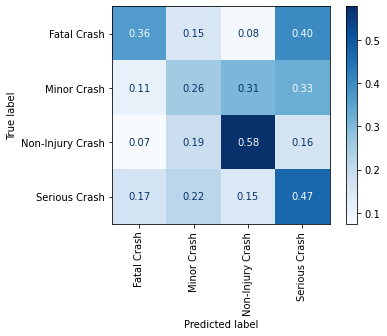

In [ ]:
%%time
pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(), 
    RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42, max_depth=40, min_samples_leaf=2)
)

pipeline.fit(X_train_over_under, y_train_over_under)

print(classification_report(y_test, pipeline.predict(X_test)))

print(f'Train accuracy: {pipeline.score(X_train, y_train):.4%}')
print(f'Test accuracy: {pipeline.score(X_test, y_test):.4%}')
plot_confusion_matrix(pipeline, X_test, y_test, 
                      xticks_rotation='vertical', 
                      normalize='true',
                      values_format='.2f',
                      cmap='Blues');

In [ ]:
(34+25+58+48)/4

41.25

                  precision    recall  f1-score   support

     Fatal Crash       0.02      0.48      0.04      1286
     Minor Crash       0.24      0.14      0.17     31690
Non-Injury Crash       0.83      0.49      0.62    100367
   Serious Crash       0.10      0.39      0.16      7822

        accuracy                           0.41    141165
       macro avg       0.30      0.38      0.25    141165
    weighted avg       0.65      0.41      0.49    141165

Train accuracy: 43.6072%
Test accuracy: 40.7537%
CPU times: user 2min 12s, sys: 215 ms, total: 2min 13s
Wall time: 1min 14s


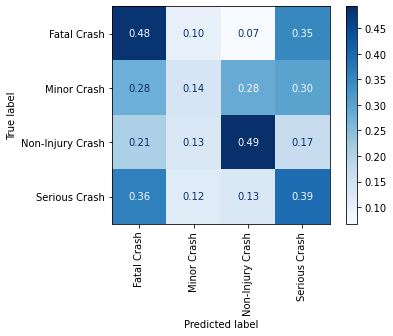

In [ ]:
%%time
pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train_over_under, y_train_over_under)

print(classification_report(y_test, pipeline.predict(X_test)))

print(f'Train accuracy: {pipeline.score(X_train, y_train):.4%}')
print(f'Test accuracy: {pipeline.score(X_test, y_test):.4%}')
plot_confusion_matrix(pipeline, X_test, y_test, 
                      xticks_rotation='vertical', 
                      normalize='true',
                      values_format='.2f',
                      cmap='Blues');

In [ ]:
(47+13+49+39)/4

37.0

37.0

37.0

In [ ]:
#=================================================== XGB HYPER PARAMITER TUNING SPACE ===================================================

                  precision    recall  f1-score   support

     Fatal Crash       0.03      0.62      0.06      1286
     Minor Crash       0.30      0.19      0.23     31690
Non-Injury Crash       0.83      0.58      0.68    100367
   Serious Crash       0.11      0.33      0.16      7822

        accuracy                           0.48    141165
       macro avg       0.32      0.43      0.28    141165
    weighted avg       0.66      0.48      0.55    141165

Train accuracy: 49.6206%
Test accuracy: 47.6726%
CPU times: user 1min 13s, sys: 129 ms, total: 1min 13s
Wall time: 44.8 s


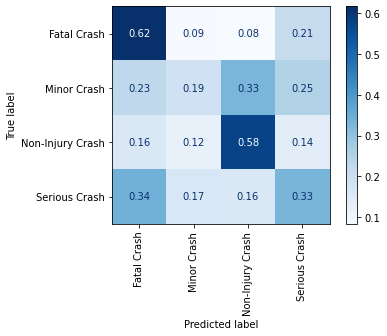

In [ ]:
%%time
pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1,max_depth=4,min_child_weight=.5,subsample=.05,colsample_bytree=.1,learning_rate=.05)
)

pipeline.fit(X_train_over_under, y_train_over_under)

print(classification_report(y_test, pipeline.predict(X_test)))

print(f'Train accuracy: {pipeline.score(X_train, y_train):.4%}')
print(f'Test accuracy: {pipeline.score(X_test, y_test):.4%}')
plot_confusion_matrix(pipeline, X_test, y_test, 
                      xticks_rotation='vertical', 
                      normalize='true',
                      values_format='.2f',
                      cmap='Blues');

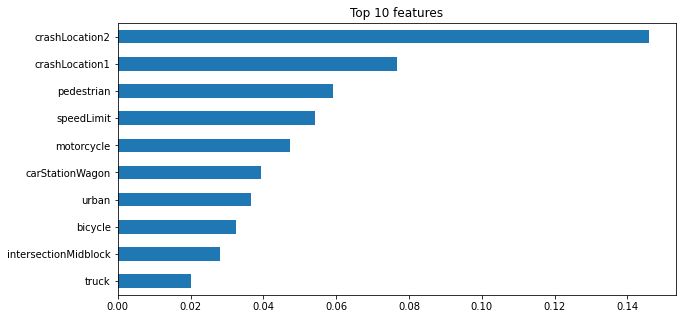

In [ ]:
rf = pipeline.named_steps['xgbclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)
n = 10

plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh()
plt.show()

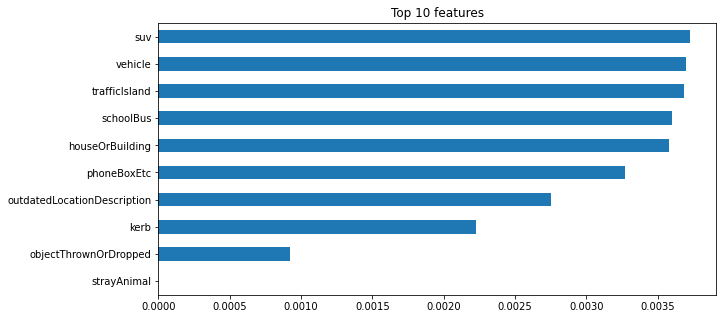

In [ ]:
rf = pipeline.named_steps['xgbclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)
n = 10

plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[:n].plot.barh()
plt.show()

In [ ]:
X_train['strayAnimal'].nunique()

3

In [ ]:
X_train['strayAnimal'].value_counts()

1.0    120
2.0     11
3.0      1
Name: strayAnimal, dtype: int64

In [ ]:
X_train.shape

(564659, 73)

In [ ]:
X_train['crashLocation2'].nunique()

43537

In [ ]:
X_train['crashLocation2']

538234    EAST RIDGE GROVE
658422     WEST COAST ROAD
527459      GRAFTON ON SBD
173852        CENTRAL ROAD
333719       GT SOUTH LINK
                ...       
469870         BIRDWOOD ST
510622        WAI ITI ROAD
204497         RAGLAN ROAD
381825       WAIWHERO ROAD
602133       WOOLLCOMBE ST
Name: crashLocation2, Length: 564659, dtype: object

In [ ]:
X_train['crashLocation1']

538234               SH 26
658422    PARRS CROSS ROAD
527459               SH 1N
173852               SH 36
333719    GREAT SOUTH ROAD
                ...       
469870          CHAYTOR ST
510622                SH 2
204497               SH 31
381825        EDWARDS ROAD
602133           LATTER ST
Name: crashLocation1, Length: 564659, dtype: object